# Problem 3

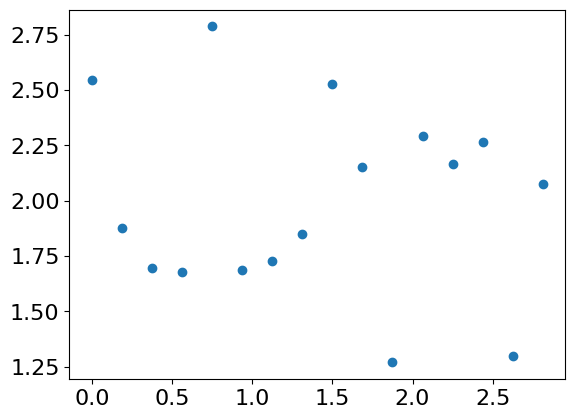

In [46]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2.5433,1.8744,1.695,1.6759,2.7873,1.6847,1.7283,1.8506,2.5267,2.1502,1.2686,
2.2924,2.1646,2.2637,1.2958,2.076])

L = 3
h = L/16
t = np.arange(0,16) * h

plt.scatter(t,x)
plt.show()

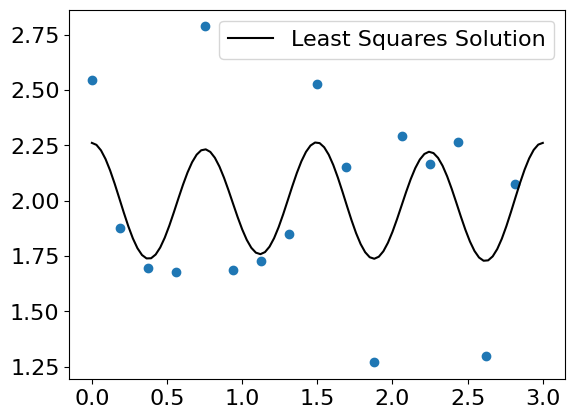

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def lin_comb(fs, cs, x, plot=False, **kwarg):
    cfs = np.zeros((len(fs), len(x)))

    for i, f in enumerate(fs):
        cfs[i, :] = cs[i]*fs[i](x)
    
    cfs = np.sum(cfs, axis=0)
    
    return cfs


n = len(x)

fs = [
lambda t: (1./np.sqrt(n)),
lambda t: (2./np.sqrt(n)) * np.cos(2.*np.pi*t/L),
lambda t: (2./np.sqrt(n)) * np.sin(2.*np.pi*t/L),
lambda t: (2./np.sqrt(n)) * np.cos(4.*np.pi*t/L),
lambda t: (2./np.sqrt(n)) * np.sin(4.*np.pi*t/L),
lambda t: (2./np.sqrt(n)) * np.cos(6.*np.pi*t/L),
lambda t: (2./np.sqrt(n)) * np.sin(6.*np.pi*t/L),
lambda t: (1./np.sqrt(n)) * np.cos(8.*np.pi*t/L),
lambda t: (1./np.sqrt(n)) * np.sin(8.*np.pi*t/L),
lambda t: (1./np.sqrt(n)) * np.cos(10.*np.pi*t/L),
]

m = 5

y_ = np.fft.fft(x, norm="ortho")[:int(n/2)+1] # Extract first n/2 indicies of DFT output (symmetry)
a_ = np.real(y_)
b_ = np.imag(y_)

# We only want first m indicies from a, and 1st to m-1 indicies of b
a = a_[:m+1]
b = b_[1:m]
y_m = np.zeros(len(a) + len(b))

y_m[0] = a[0]
y_m[-1] = a[-1]

for j in range(m-1):
    y_m[2*j+1] = a[j+1]
    y_m[2*j+2] = b[j]

tt = np.linspace(0,L,100)
soln = lin_comb(fs,y_m,tt)

plt.scatter(t,x)
plt.plot(tt, soln, label='Least Squares Solution', c='k')
plt.legend()
plt.show()